Pipe1 :
To check if user input image is a car or not.
Data0 - dataset of all images of cars(damaged and undamaged ones)

In [2]:
import os
import h5py
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
from IPython.display import Image, display, clear_output
from collections import Counter, defaultdict
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, History

In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [7]:
import tarfile

fname = 'C:/Users/nthaku3/CS_512_Project/car-damage-dataset.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
    

In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    return img

Image shape: (194, 259, 3)


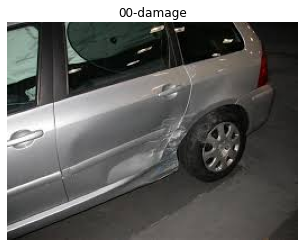

In [10]:
# View a random image 
img = view_random_image(target_dir="C:/Users/nthaku3/CS_512_Project/preprocessed/data1a/training/",
                        target_class="00-damage")

In [11]:
train="C:/Users/nthaku3/CS_512_Project/preprocessed/data1a/training"
test="C:/Users/nthaku3/CS_512_Project/preprocessed/data1a/validation"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42, subset='training' )

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_0 = Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(64, activation="relu"),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_0 = model_0.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
58/58 [==============================] - 54s 910ms/step - loss: 0.6963 - accuracy: 0.6141 - val_loss: 0.6387 - val_accuracy: 0.6087
Epoch 2/5
58/58 [==============================] - 39s 677ms/step - loss: 0.5428 - accuracy: 0.7326 - val_loss: 0.5082 - val_accuracy: 0.7435
Epoch 3/5
58/58 [==============================] - 40s 686ms/step - loss: 0.4451 - accuracy: 0.7957 - val_loss: 0.5204 - val_accuracy: 0.7152
Epoch 4/5
58/58 [==============================] - 41s 714ms/step - loss: 0.3537 - accuracy: 0.8522 - val_loss: 0.4985 - val_accuracy: 0.7761
Epoch 5/5
58/58 [==============================] - 40s 693ms/step - loss: 0.2563 - accuracy: 0.8962 - val_loss: 0.4966 - val_accuracy: 0.7891


In [15]:
vgg16_weight_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

# Fit the model 
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

58900480/58889256 [==============================] - 3s 0us/step
Epoch 1/10
58/58 [==============================] - 275s 5s/step - loss: 0.4088 - accuracy: 0.8103 - val_loss: 0.2422 - val_accuracy: 0.8935
Epoch 2/10
58/58 [==============================] - 284s 5s/step - loss: 0.2403 - accuracy: 0.8995 - val_loss: 0.2127 - val_accuracy: 0.9174
Epoch 3/10
58/58 [==============================] - 288s 5s/step - loss: 0.1822 - accuracy: 0.9304 - val_loss: 0.2282 - val_accuracy: 0.9043
Epoch 4/10
58/58 [==============================] - 283s 5s/step - loss: 0.1392 - accuracy: 0.9473 - val_loss: 0.2089 - val_accuracy: 0.9152
Epoch 5/10
58/58 [==============================] - 305s 5s/step - loss: 0.1093 - accuracy: 0.9647 - val_loss: 0.2000 - val_accuracy: 0.9109
Epoch 6/10
58/58 [==============================] - 290s 5s/step - loss: 0.1016 - accuracy: 0.9592 - val_loss: 0.2076 - val_accuracy: 0.9130
Epoch 7/10
58/58 [==============================] - 291s 5s/step - loss: 0.0778 - accurac

In [16]:
model.save('car_damage_or_not_detection-model.h5')

In [26]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def pred_and_plot(model, filename):
    
    #Import the target image and preprocess it
    
    img = load_and_prep_image(filename)

    #Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred=pred.round()
    if pred==0:
        pred_class="Damage"
    else:
        pred_class="No Damage"  
    
    #Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

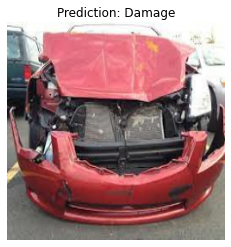

In [27]:
# Test our model 
pred_and_plot(model, "C:/Users/nthaku3/CS_512_Project/preprocessed/test1.jpg")

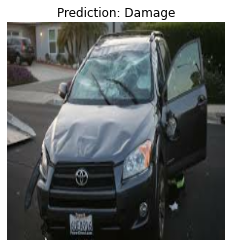

In [28]:
# Test our model 
pred_and_plot(model, "C:/Users/nthaku3/CS_512_Project/preprocessed/test2.jpg")

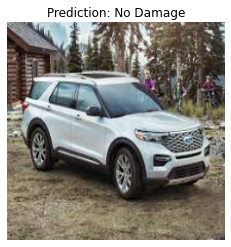

In [29]:
# Test our model 
pred_and_plot(model, "C:/Users/nthaku3/CS_512_Project/preprocessed/test3.jpg")